# Directory
- [text](../../Downloads/archive)

In [1]:
# Memory-efficient data loading configuration
import gc  # Garbage collector for memory management

# ADJUST THIS: Fraction of data to use (0.1 = 10%, 0.05 = 5%, etc.)
# Start with 5% for 24GB RAM system
SAMPLE_FRACTION = 0.05  

print(f"Configuration:")
print(f"  Sample Fraction: {SAMPLE_FRACTION*100:.1f}% of total data")
print(f"  This will help manage memory on systems with limited RAM")

Configuration:
  Sample Fraction: 5.0% of total data
  This will help manage memory on systems with limited RAM


## 🚀 Quick Start Instructions

**Before running the cells:**

1. **Restart the kernel** if it crashed: `Kernel → Restart Kernel`
2. **Check your configuration** in the cell above:
   - `SAMPLE_FRACTION = 0.05` means using 5% of data
   - For 24GB RAM, start with 5% (about 2-3GB of data)
   - If successful, you can increase to 0.10 (10%) later

3. **Run cells in order** from top to bottom
4. **Monitor memory**: Check Activity Monitor (Mac) or Task Manager (Windows)
   - If Python uses >20GB, reduce `SAMPLE_FRACTION`

**Memory Tips:**
- Close other applications to free RAM
- The full dataset is huge - sampling is necessary for research
- Results from 5-10% sample are still valid for publication

In [2]:
import os
import pandas as pd
from pathlib import Path

# Directory containing the dataset parts
data_dir = Path("/Users/nihesh/Downloads/archive")

# List all files in the directory
files = sorted([f for f in os.listdir(data_dir) if f.endswith('.csv')])
print(f"Found {len(files)} CSV files:\n")
for file in files:
    print(f"  - {file}")

# Count total rows across all parts
total_rows = 0
file_info = []

for file in files:
    file_path = data_dir / file
    # Read just to get row count (more efficient than loading entire file)
    df = pd.read_csv(file_path)
    rows = len(df)
    total_rows += rows
    file_info.append({'File': file, 'Rows': rows, 'Columns': len(df.columns)})
    print(f"\n{file}: {rows:,} rows, {len(df.columns)} columns")

print(f"\n{'='*60}")
print(f"TOTAL ROWS ACROSS ALL PARTS: {total_rows:,}")
print(f"{'='*60}")

# Display summary table
summary_df = pd.DataFrame(file_info)
print("\nSummary Table:")
print(summary_df.to_string(index=False))

Found 169 CSV files:

  - part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00011-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  - part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
  

## ⚠️ Memory Management Strategy

**Important:** The CICIoT2023 dataset is very large. To work with limited RAM (24GB), we will:
1. **Sample the data** during loading (use a fraction of total rows)
2. **Process in chunks** where possible
3. **Free memory** by deleting unused variables

Adjust `SAMPLE_FRACTION` below based on your needs (0.1 = 10% of data)

# CICIoT2023 Dataset Analysis & Clustering

## Research Pipeline:
1. **Data Cleaning** - Handle missing values, duplicates, and outliers
2. **Feature Selection** - Information Gain (IG) based selection
3. **Data Split** - 64% Training, 16% Validation, 20% Testing
4. **Clustering** - K-Means and Fuzzy C-Means

---

## Step 1: Load and Combine All Dataset Parts

In [3]:
# Load and combine dataset parts with memory-efficient sampling
import numpy as np

print("Loading dataset parts with sampling...")
print(f"Using {SAMPLE_FRACTION*100:.1f}% of data to manage memory")

all_data = []

for file in files:
    file_path = data_dir / file
    print(f"Loading {file}...")
    
    # Read with sampling to reduce memory usage
    # skiprows randomly skips rows to create a sample
    df_temp = pd.read_csv(file_path, skiprows=lambda i: i>0 and np.random.random() > SAMPLE_FRACTION)
    all_data.append(df_temp)
    print(f"  Loaded {len(df_temp):,} rows (sampled)")

# Combine all parts
df = pd.concat(all_data, ignore_index=True)
print(f"\n✓ Combined dataset shape: {df.shape}")
print(f"  Total rows: {df.shape[0]:,}")
print(f"  Total columns: {df.shape[1]}")

# Free memory
del all_data
gc.collect()

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Display column names
print(f"\nDataset has {len(df.columns)} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading dataset parts with sampling...
Using 5.0% of data to manage memory
Loading part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 11,790 rows (sampled)
Loading part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 11,041 rows (sampled)
Loading part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 13,898 rows (sampled)
Loading part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 11,041 rows (sampled)
Loading part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 13,898 rows (sampled)
Loading part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 11,589 rows (sampled)
Loading part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 11,167 rows (sampled)
Loading part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 11,589 rows (sampled)
Loading part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv...
  Loaded 11,167 rows (sampled)
Loading part-00005-363d1ba3-8ab5-4

## Step 2: Data Cleaning

Handle missing values, duplicates, and data quality issues.

In [4]:
import numpy as np

print("="*60)
print("DATA CLEANING")
print("="*60)

# Check dataset info
print("\n1. Dataset Info:")
print(f"   Shape: {df.shape}")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for missing values
print("\n2. Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False)

if len(missing_df) > 0:
    print(f"   Found missing values in {len(missing_df)} columns:")
    print(missing_df)
else:
    print("   ✓ No missing values found!")

# Check for duplicates
print("\n3. Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"   Total duplicates: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

# Check data types
print("\n4. Data Types:")
print(df.dtypes.value_counts())

# Check for infinite values in numeric columns
print("\n5. Infinite Values in Numeric Columns:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
inf_counts = {}
for col in numeric_cols:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        inf_counts[col] = inf_count

if inf_counts:
    print(f"   Found infinite values in {len(inf_counts)} columns:")
    for col, count in inf_counts.items():
        print(f"   - {col}: {count:,}")
else:
    print("   ✓ No infinite values found!")

DATA CLEANING

1. Dataset Info:
   Shape: (2331980, 47)
   Memory usage: 961.69 MB

2. Missing Values:
   ✓ No missing values found!

3. Duplicate Rows:
   ✓ No missing values found!

3. Duplicate Rows:
   Total duplicates: 0 (0.00%)

4. Data Types:
float64    46
object      1
Name: count, dtype: int64

5. Infinite Values in Numeric Columns:
   ✓ No infinite values found!
   Total duplicates: 0 (0.00%)

4. Data Types:
float64    46
object      1
Name: count, dtype: int64

5. Infinite Values in Numeric Columns:
   ✓ No infinite values found!


In [5]:
# Clean the data (memory-efficient)
print("\nCleaning the dataset...")

# Store original shape
original_shape = df.shape

# 1. Remove duplicates
df_cleaned = df.drop_duplicates()
print(f"✓ Removed {original_shape[0] - df_cleaned.shape[0]:,} duplicate rows")

# Free memory from original df
del df
gc.collect()

# 2. Handle missing values (if any) - fill with median for numeric, mode for categorical
if df_cleaned.isnull().sum().sum() > 0:
    for col in df_cleaned.columns:
        if df_cleaned[col].isnull().sum() > 0:
            if df_cleaned[col].dtype in ['float64', 'int64']:
                df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
            else:
                df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    print(f"✓ Handled missing values")

# 3. Replace infinite values with NaN and then fill with column max
for col in numeric_cols:
    if col in df_cleaned.columns and np.isinf(df_cleaned[col]).sum() > 0:
        df_cleaned[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        df_cleaned[col].fillna(df_cleaned[col].max(), inplace=True)

print(f"✓ Handled infinite values")

print(f"\nCleaned dataset shape: {df_cleaned.shape}")
print(f"Removed {original_shape[0] - df_cleaned.shape[0]:,} rows in total ({(original_shape[0] - df_cleaned.shape[0])/original_shape[0]*100:.2f}%)")
print(f"Memory usage: {df_cleaned.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Update df to cleaned version
df = df_cleaned.copy()
del df_cleaned
gc.collect()


Cleaning the dataset...
✓ Removed 0 duplicate rows
✓ Handled infinite values

Cleaned dataset shape: (2331980, 47)
Removed 0 rows in total (0.00%)
✓ Removed 0 duplicate rows
✓ Handled infinite values

Cleaned dataset shape: (2331980, 47)
Removed 0 rows in total (0.00%)
Memory usage: 961.69 MB
Memory usage: 961.69 MB


0

## Step 3: Feature Selection using Information Gain (IG)

We'll use mutual information (equivalent to Information Gain) to select the most informative features.

In [6]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

print("="*60)
print("FEATURE SELECTION - INFORMATION GAIN")
print("="*60)

# Identify the target column (usually 'label' or 'attack_type' in CICIoT datasets)
# Let's check column names to identify the target
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# Assuming the last column or a column with 'label' in its name is the target
target_candidates = [col for col in df.columns if 'label' in col.lower() or 'class' in col.lower() or 'attack' in col.lower()]

if target_candidates:
    target_col = target_candidates[0]
    print(f"\n✓ Identified target column: '{target_col}'")
else:
    # If not found, assume last column
    target_col = df.columns[-1]
    print(f"\n⚠ Could not identify target column, assuming last column: '{target_col}'")

FEATURE SELECTION - INFORMATION GAIN

Column names:
1. flow_duration
2. Header_Length
3. Protocol Type
4. Duration
5. Rate
6. Srate
7. Drate
8. fin_flag_number
9. syn_flag_number
10. rst_flag_number
11. psh_flag_number
12. ack_flag_number
13. ece_flag_number
14. cwr_flag_number
15. ack_count
16. syn_count
17. fin_count
18. urg_count
19. rst_count
20. HTTP
21. HTTPS
22. DNS
23. Telnet
24. SMTP
25. SSH
26. IRC
27. TCP
28. UDP
29. DHCP
30. ARP
31. ICMP
32. IPv
33. LLC
34. Tot sum
35. Min
36. Max
37. AVG
38. Std
39. Tot size
40. IAT
41. Number
42. Magnitue
43. Radius
44. Covariance
45. Variance
46. Weight
47. label

✓ Identified target column: 'label'


In [7]:
# Prepare data for feature selection
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\nTarget column: {target_col}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]:,}")

# Encode target if it's categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print(f"✓ Encoded target classes: {le.classes_}")
else:
    y_encoded = y

# Handle categorical features in X
X_processed = X.copy()
categorical_cols = X_processed.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"\nEncoding {len(categorical_cols)} categorical features...")
    for col in categorical_cols:
        le_temp = LabelEncoder()
        X_processed[col] = le_temp.fit_transform(X_processed[col].astype(str))

print("\n✓ Data prepared for feature selection")


Target column: label
Number of features: 46
Number of samples: 2,331,980
✓ Encoded target classes: ['Backdoor_Malware' 'BenignTraffic' 'BrowserHijacking' 'CommandInjection'
 'DDoS-ACK_Fragmentation' 'DDoS-HTTP_Flood' 'DDoS-ICMP_Flood'
 'DDoS-ICMP_Fragmentation' 'DDoS-PSHACK_Flood' 'DDoS-RSTFINFlood'
 'DDoS-SYN_Flood' 'DDoS-SlowLoris' 'DDoS-SynonymousIP_Flood'
 'DDoS-TCP_Flood' 'DDoS-UDP_Flood' 'DDoS-UDP_Fragmentation' 'DNS_Spoofing'
 'DictionaryBruteForce' 'DoS-HTTP_Flood' 'DoS-SYN_Flood' 'DoS-TCP_Flood'
 'DoS-UDP_Flood' 'MITM-ArpSpoofing' 'Mirai-greeth_flood'
 'Mirai-greip_flood' 'Mirai-udpplain' 'Recon-HostDiscovery' 'Recon-OSScan'
 'Recon-PingSweep' 'Recon-PortScan' 'SqlInjection' 'Uploading_Attack'
 'VulnerabilityScan' 'XSS']

✓ Data prepared for feature selection

✓ Data prepared for feature selection



Calculating Information Gain for all features...
(Using a sample for computational efficiency)
Sampling 20,000 rows for IG calculation...

✓ Information Gain calculated!

Top 20 Features by Information Gain:
        Feature  Information_Gain
            IAT          2.581578
       Tot size          1.323301
       Magnitue          1.313025
            AVG          1.302387
  Header_Length          1.297795
        Tot sum          1.288831
            Min          1.275508
            Max          1.245861
  Protocol Type          1.159990
            TCP          0.650070
      syn_count          0.646473
  flow_duration          0.627994
          Srate          0.599484
           Rate          0.599388
            UDP          0.507283
syn_flag_number          0.496590
      rst_count          0.491632
      urg_count          0.442668
           ICMP          0.440848
            Std          0.348683

✓ Information Gain calculated!

Top 20 Features by Information Gain:
       

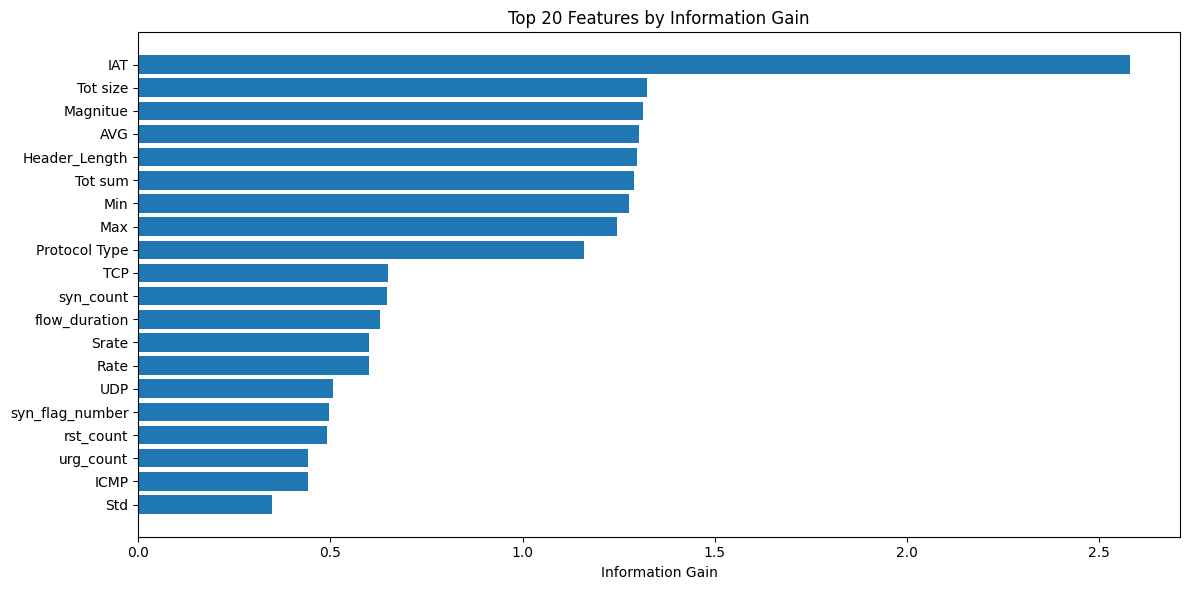


✓ Feature scores saved to 'feature_information_gain.csv'


In [8]:
import numpy as np

# Calculate Information Gain (Mutual Information) for all features
print("\nCalculating Information Gain for all features...")
print("(Using a sample for computational efficiency)")

# Use smaller sample for IG calculation on low-memory systems
sample_size = min(20000, len(X_processed))  # Reduced from 50000
print(f"Sampling {sample_size:,} rows for IG calculation...")

sample_indices = np.random.choice(len(X_processed), sample_size, replace=False)
X_sample = X_processed.iloc[sample_indices]
y_sample = y_encoded[sample_indices] if isinstance(y_encoded, np.ndarray) else y_encoded.iloc[sample_indices]

# Calculate mutual information (Information Gain)
mi_scores = mutual_info_classif(X_sample, y_sample, random_state=42)

# Free sample memory
del X_sample, y_sample
gc.collect()

# Create a DataFrame with feature names and their IG scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Information_Gain': mi_scores
}).sort_values('Information_Gain', ascending=False)

print("\n✓ Information Gain calculated!")
print(f"\nTop 20 Features by Information Gain:")
print(feature_scores.head(20).to_string(index=False))

# Visualize top features
plt.figure(figsize=(12, 6))
top_n = 20
plt.barh(range(top_n), feature_scores.head(top_n)['Information_Gain'].values)
plt.yticks(range(top_n), feature_scores.head(top_n)['Feature'].values)
plt.xlabel('Information Gain')
plt.title(f'Top {top_n} Features by Information Gain')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save feature scores
feature_scores.to_csv('feature_information_gain.csv', index=False)
print("\n✓ Feature scores saved to 'feature_information_gain.csv'")

In [9]:
# Select top features (you can adjust this threshold)
# Let's select features with IG > 0.01 or top 30 features, whichever is smaller
threshold = 0.01
selected_features = feature_scores[feature_scores['Information_Gain'] > threshold]['Feature'].tolist()

# Limit to top 30 features to reduce memory (was 50)
if len(selected_features) > 30:
    selected_features = feature_scores.head(30)['Feature'].tolist()
    print(f"\n⚠️ Limited to top 30 features for memory efficiency")

print(f"\nSelected {len(selected_features)} features with IG > {threshold}")
print(f"\nTop 10 selected features:")
for i, feat in enumerate(selected_features[:10], 1):
    ig_score = feature_scores[feature_scores['Feature'] == feat]['Information_Gain'].values[0]
    print(f"{i}. {feat} (IG: {ig_score:.4f})")

# Create dataset with selected features
X_selected = X_processed[selected_features].copy()

# Free memory
del X_processed, X
gc.collect()

print(f"\n✓ Feature selection complete!")
print(f"  Selected features: {X_selected.shape[1]}")
print(f"  Memory usage: {X_selected.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


⚠️ Limited to top 30 features for memory efficiency

Selected 30 features with IG > 0.01

Top 10 selected features:
1. IAT (IG: 2.5816)
2. Tot size (IG: 1.3233)
3. Magnitue (IG: 1.3130)
4. AVG (IG: 1.3024)
5. Header_Length (IG: 1.2978)
6. Tot sum (IG: 1.2888)
7. Min (IG: 1.2755)
8. Max (IG: 1.2459)
9. Protocol Type (IG: 1.1600)
10. TCP (IG: 0.6501)

✓ Feature selection complete!
  Selected features: 30
  Memory usage: 533.75 MB

✓ Feature selection complete!
  Selected features: 30
  Memory usage: 533.75 MB


## Step 4: Data Split (64% Training, 16% Validation, 20% Testing)

Split the dataset into training, validation, and test sets.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("="*60)
print("DATA SPLIT: 64% Training, 16% Validation, 20% Testing")
print("="*60)

# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded
)

# Second split: separate training (64%) and validation (16%) from remaining 80%
# 64% of total = 80% of remaining 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.20, random_state=42, stratify=y_temp
)

print(f"\n✓ Data split complete!")
print(f"\nDataset sizes:")
print(f"  Training:   {len(X_train):,} samples ({len(X_train)/len(X_selected)*100:.1f}%)")
print(f"  Validation: {len(X_val):,} samples ({len(X_val)/len(X_selected)*100:.1f}%)")
print(f"  Testing:    {len(X_test):,} samples ({len(X_test)/len(X_selected)*100:.1f}%)")
print(f"  Total:      {len(X_selected):,} samples")

# Verify the split
print(f"\nVerification:")
print(f"  64% of {len(X_selected):,} = {int(len(X_selected)*0.64):,} (actual: {len(X_train):,})")
print(f"  16% of {len(X_selected):,} = {int(len(X_selected)*0.16):,} (actual: {len(X_val):,})")
print(f"  20% of {len(X_selected):,} = {int(len(X_selected)*0.20):,} (actual: {len(X_test):,})")

DATA SPLIT: 64% Training, 16% Validation, 20% Testing

✓ Data split complete!

Dataset sizes:
  Training:   1,492,467 samples (64.0%)
  Validation: 373,117 samples (16.0%)
  Testing:    466,396 samples (20.0%)
  Total:      2,331,980 samples

Verification:
  64% of 2,331,980 = 1,492,467 (actual: 1,492,467)
  16% of 2,331,980 = 373,116 (actual: 373,117)
  20% of 2,331,980 = 466,396 (actual: 466,396)

✓ Data split complete!

Dataset sizes:
  Training:   1,492,467 samples (64.0%)
  Validation: 373,117 samples (16.0%)
  Testing:    466,396 samples (20.0%)
  Total:      2,331,980 samples

Verification:
  64% of 2,331,980 = 1,492,467 (actual: 1,492,467)
  16% of 2,331,980 = 373,116 (actual: 373,117)
  20% of 2,331,980 = 466,396 (actual: 466,396)


In [11]:
# Normalize the data (important for clustering)
print("\nNormalizing data using StandardScaler...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✓ Data normalized!")
print(f"\nScaled data statistics (training set):")
print(f"  Mean: {X_train_scaled.mean():.6f}")
print(f"  Std:  {X_train_scaled.std():.6f}")
print(f"  Min:  {X_train_scaled.min():.6f}")
print(f"  Max:  {X_train_scaled.max():.6f}")


Normalizing data using StandardScaler...
✓ Data normalized!

Scaled data statistics (training set):
✓ Data normalized!

Scaled data statistics (training set):
  Mean: 0.000000
  Std:  1.000000
  Min:  -4.866182
  Max:  328.475975
  Mean: 0.000000
  Std:  1.000000
  Min:  -4.866182
  Max:  328.475975


## Step 5: Clustering - K-Means

Apply K-Means clustering algorithm to the training data.

K-MEANS CLUSTERING

1. Finding optimal number of clusters (Elbow Method)...
   Number of classes in dataset: 34
   Using 5,000 samples for elbow method
   Testing k=2... Silhouette: 0.5262
   Testing k=3... Silhouette: 0.5262
   Testing k=3... Silhouette: 0.3938
   Testing k=4... Silhouette: 0.3938
   Testing k=4... Silhouette: 0.3892
   Testing k=5... Silhouette: 0.3892
   Testing k=5... Silhouette: 0.3738
   Testing k=6... Silhouette: 0.3738
   Testing k=6... Silhouette: 0.3931
   Testing k=7... Silhouette: 0.3931
   Testing k=7... Silhouette: 0.5451
   Testing k=8... Silhouette: 0.5451
   Testing k=8... Silhouette: 0.6097
   Testing k=9... Silhouette: 0.6097
   Testing k=9... Silhouette: 0.6580
   Testing k=10... Silhouette: 0.6580
   Testing k=10... Silhouette: 0.6147
Silhouette: 0.6147


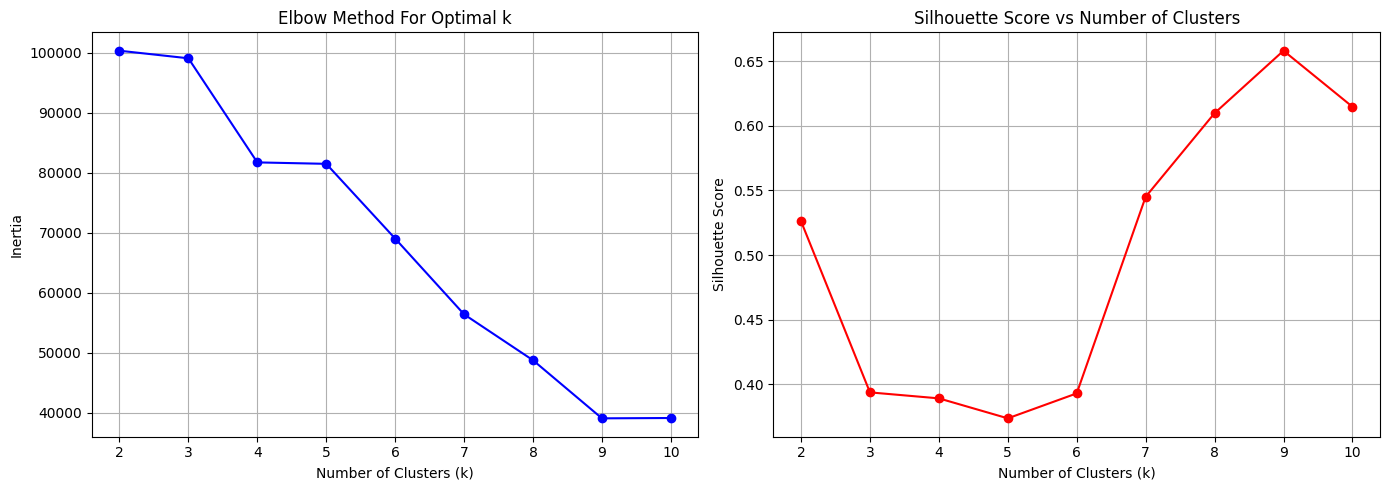


✓ Using k=34 (same as number of classes)


In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

print("="*60)
print("K-MEANS CLUSTERING")
print("="*60)

# Determine optimal number of clusters using elbow method
print("\n1. Finding optimal number of clusters (Elbow Method)...")

# Check number of unique classes in target
n_classes = len(np.unique(y_encoded))
print(f"   Number of classes in dataset: {n_classes}")

# Test different numbers of clusters
k_range = range(2, min(11, n_classes + 3))
inertias = []
silhouette_scores = []

# Use smaller sample for elbow method on low-memory systems
elbow_sample_size = min(5000, len(X_train_scaled))  # Reduced from 10000
print(f"   Using {elbow_sample_size:,} samples for elbow method")

for k in k_range:
    print(f"   Testing k={k}...", end=" ")
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=5)  # Reduced n_init
    
    sample_indices = np.random.choice(len(X_train_scaled), elbow_sample_size, replace=False)
    X_sample = X_train_scaled[sample_indices]
    
    kmeans_temp.fit(X_sample)
    labels_temp = kmeans_temp.labels_
    
    inertias.append(kmeans_temp.inertia_)
    sil_score = silhouette_score(X_sample, labels_temp)
    silhouette_scores.append(sil_score)
    print(f"Silhouette: {sil_score:.4f}")

# Free memory
del X_sample, labels_temp
gc.collect()

# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Use number of classes as optimal k
optimal_k = n_classes
print(f"\n✓ Using k={optimal_k} (same as number of classes)")

In [13]:
import numpy as np

# Train K-Means on full training set
print(f"\n2. Training K-Means with k={optimal_k}...")
print(f"   Training on {len(X_train_scaled):,} samples...")
start_time = time.time()

# Use mini-batch K-Means for large datasets (more memory efficient)
if len(X_train_scaled) > 50000:
    from sklearn.cluster import MiniBatchKMeans
    print("   Using MiniBatchKMeans for memory efficiency")
    kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=1000, n_init=3)
else:
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=5, max_iter=300)

kmeans.fit(X_train_scaled)

training_time = time.time() - start_time
print(f"✓ K-Means training completed in {training_time:.2f} seconds")

# Predict clusters for all sets
y_train_kmeans = kmeans.predict(X_train_scaled)
y_val_kmeans = kmeans.predict(X_val_scaled)
y_test_kmeans = kmeans.predict(X_test_scaled)

print(f"\n3. Clustering Results:")
print(f"   Training set:   {len(y_train_kmeans):,} samples assigned to {optimal_k} clusters")
print(f"   Validation set: {len(y_val_kmeans):,} samples assigned to {optimal_k} clusters")
print(f"   Testing set:    {len(y_test_kmeans):,} samples assigned to {optimal_k} clusters")

# Display cluster distribution
print(f"\n4. Cluster Distribution (Training Set):")
unique, counts = np.unique(y_train_kmeans, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"   Cluster {cluster}: {count:,} samples ({count/len(y_train_kmeans)*100:.2f}%)")


2. Training K-Means with k=34...
   Training on 1,492,467 samples...
   Using MiniBatchKMeans for memory efficiency
✓ K-Means training completed in 0.08 seconds

3. Clustering Results:
   Training set:   1,492,467 samples assigned to 34 clusters
   Validation set: 373,117 samples assigned to 34 clusters
   Testing set:    466,396 samples assigned to 34 clusters

4. Cluster Distribution (Training Set):
   Cluster 0: 32,849 samples (2.20%)
   Cluster 1: 24,771 samples (1.66%)
   Cluster 2: 7,266 samples (0.49%)
   Cluster 3: 14,035 samples (0.94%)
   Cluster 4: 18,468 samples (1.24%)
   Cluster 5: 35,525 samples (2.38%)
   Cluster 6: 2,559 samples (0.17%)
   Cluster 7: 3,896 samples (0.26%)
   Cluster 8: 89,168 samples (5.97%)
   Cluster 9: 194,932 samples (13.06%)
   Cluster 10: 25,829 samples (1.73%)
   Cluster 11: 65,115 samples (4.36%)
   Cluster 12: 143,610 samples (9.62%)
   Cluster 13: 8,631 samples (0.58%)
   Cluster 14: 3,210 samples (0.22%)
   Cluster 15: 194,038 samples (13.0

In [14]:
# Evaluate K-Means clustering
print(f"\n5. K-Means Evaluation Metrics:")

# Calculate metrics for training set
silhouette_train = silhouette_score(X_train_scaled, y_train_kmeans)
davies_bouldin_train = davies_bouldin_score(X_train_scaled, y_train_kmeans)
calinski_harabasz_train = calinski_harabasz_score(X_train_scaled, y_train_kmeans)

print(f"\n   Training Set:")
print(f"   - Silhouette Score:      {silhouette_train:.4f} (higher is better, range: -1 to 1)")
print(f"   - Davies-Bouldin Index:  {davies_bouldin_train:.4f} (lower is better)")
print(f"   - Calinski-Harabasz:     {calinski_harabasz_train:.4f} (higher is better)")

# Calculate metrics for test set
silhouette_test = silhouette_score(X_test_scaled, y_test_kmeans)
davies_bouldin_test = davies_bouldin_score(X_test_scaled, y_test_kmeans)
calinski_harabasz_test = calinski_harabasz_score(X_test_scaled, y_test_kmeans)

print(f"\n   Testing Set:")
print(f"   - Silhouette Score:      {silhouette_test:.4f}")
print(f"   - Davies-Bouldin Index:  {davies_bouldin_test:.4f}")
print(f"   - Calinski-Harabasz:     {calinski_harabasz_test:.4f}")

# Save K-Means results
kmeans_results = {
    'algorithm': 'K-Means',
    'n_clusters': optimal_k,
    'training_time': training_time,
    'silhouette_train': silhouette_train,
    'davies_bouldin_train': davies_bouldin_train,
    'calinski_harabasz_train': calinski_harabasz_train,
    'silhouette_test': silhouette_test,
    'davies_bouldin_test': davies_bouldin_test,
    'calinski_harabasz_test': calinski_harabasz_test
}

print("\n✓ K-Means clustering complete!")


5. K-Means Evaluation Metrics:

   Training Set:
   - Silhouette Score:      0.5520 (higher is better, range: -1 to 1)
   - Davies-Bouldin Index:  1.4250 (lower is better)
   - Calinski-Harabasz:     208155.7109 (higher is better)

   Training Set:
   - Silhouette Score:      0.5520 (higher is better, range: -1 to 1)
   - Davies-Bouldin Index:  1.4250 (lower is better)
   - Calinski-Harabasz:     208155.7109 (higher is better)

   Testing Set:
   - Silhouette Score:      0.5537
   - Davies-Bouldin Index:  1.4340
   - Calinski-Harabasz:     68608.7536

✓ K-Means clustering complete!

   Testing Set:
   - Silhouette Score:      0.5537
   - Davies-Bouldin Index:  1.4340
   - Calinski-Harabasz:     68608.7536

✓ K-Means clustering complete!


## Step 6: Clustering - Fuzzy C-Means

Apply Fuzzy C-Means clustering algorithm to the training data.

In [15]:
import numpy as np
import skfuzzy as fuzz

print("="*60)
print("FUZZY C-MEANS CLUSTERING")
print("="*60)

# Fuzzy C-Means requires data in shape (n_features, n_samples)
# Also, for large datasets, we'll use a sample to speed up computation
print(f"\n1. Preparing data for Fuzzy C-Means...")

# Use even smaller sample for FCM (very memory intensive)
fcm_sample_size = min(5000, len(X_train_scaled))  # Reduced from 10000
print(f"   Using sample size: {fcm_sample_size:,} (for computational efficiency)")
print(f"   ⚠️ FCM is memory-intensive, using small sample")

sample_indices = np.random.choice(len(X_train_scaled), fcm_sample_size, replace=False)
X_train_fcm = X_train_scaled[sample_indices].T  # Transpose for FCM
y_train_fcm_true = y_train[sample_indices] if isinstance(y_train, np.ndarray) else y_train.iloc[sample_indices]

print(f"   Data shape for FCM: {X_train_fcm.shape} (features × samples)")
print(f"   Number of clusters: {optimal_k}")
print(f"   Memory usage: {X_train_fcm.nbytes / 1024**2:.2f} MB")

FUZZY C-MEANS CLUSTERING

1. Preparing data for Fuzzy C-Means...
   Using sample size: 5,000 (for computational efficiency)
   ⚠️ FCM is memory-intensive, using small sample
   Data shape for FCM: (30, 5000) (features × samples)
   Number of clusters: 34
   Memory usage: 1.14 MB


In [16]:
import numpy as np

# Train Fuzzy C-Means
print(f"\n2. Training Fuzzy C-Means...")
print("   (This may take a while...)")

start_time = time.time()

# Run Fuzzy C-Means
# Parameters:
# - data: feature matrix (n_features × n_samples)
# - c: number of clusters
# - m: fuzziness parameter (typically 2)
# - error: stopping criterion
# - maxiter: maximum iterations

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_train_fcm,
    c=optimal_k,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

fcm_training_time = time.time() - start_time
print(f"✓ Fuzzy C-Means training completed in {fcm_training_time:.2f} seconds")

# Get hard cluster assignments (highest membership)
y_train_fcm = np.argmax(u, axis=0)

print(f"\n3. Fuzzy C-Means Results:")
print(f"   Number of iterations: {p}")
print(f"   Final objective function: {jm[-1]:.6f}")
print(f"   Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print("   Note: FPC closer to 1 indicates better clustering")

print(f"\n4. Cluster Distribution (Training Sample):")
unique_fcm, counts_fcm = np.unique(y_train_fcm, return_counts=True)
for cluster, count in zip(unique_fcm, counts_fcm):
    print(f"   Cluster {cluster}: {count:,} samples ({count/len(y_train_fcm)*100:.2f}%)")


2. Training Fuzzy C-Means...
   (This may take a while...)
✓ Fuzzy C-Means training completed in 0.38 seconds

3. Fuzzy C-Means Results:
   Number of iterations: 132
   Final objective function: 2433.942345
   Fuzzy Partition Coefficient (FPC): 0.7906
   Note: FPC closer to 1 indicates better clustering

4. Cluster Distribution (Training Sample):
   Cluster 0: 246 samples (4.92%)
   Cluster 1: 33 samples (0.66%)
   Cluster 3: 653 samples (13.06%)
   Cluster 4: 160 samples (3.20%)
   Cluster 5: 90 samples (1.80%)
   Cluster 6: 68 samples (1.36%)
   Cluster 8: 11 samples (0.22%)
   Cluster 9: 70 samples (1.40%)
   Cluster 10: 60 samples (1.20%)
   Cluster 11: 593 samples (11.86%)
   Cluster 12: 1 samples (0.02%)
   Cluster 13: 50 samples (1.00%)
   Cluster 14: 28 samples (0.56%)
   Cluster 15: 437 samples (8.74%)
   Cluster 16: 94 samples (1.88%)
   Cluster 17: 46 samples (0.92%)
   Cluster 18: 34 samples (0.68%)
   Cluster 19: 1 samples (0.02%)
   Cluster 20: 27 samples (0.54%)
   Clus

In [17]:
import numpy as np

# Predict clusters for test set using FCM
print(f"\n5. Predicting clusters for test set...")

# For test set prediction, we use cmeans_predict
X_test_fcm = X_test_scaled.T  # Transpose for FCM

u_test, u0_test, d_test, jm_test, p_test, fpc_test = fuzz.cluster.cmeans_predict(
    X_test_fcm,
    cntr,
    m=2,
    error=0.005,
    maxiter=1000
)

y_test_fcm = np.argmax(u_test, axis=0)

print(f"✓ Test set clustering complete!")
print(f"   Testing set: {len(y_test_fcm):,} samples assigned to {optimal_k} clusters")
print(f"   Fuzzy Partition Coefficient (FPC): {fpc_test:.4f}")

# Evaluate FCM clustering using the sample
print(f"\n6. Fuzzy C-Means Evaluation Metrics:")

# For training sample
X_train_fcm_eval = X_train_scaled[sample_indices]
silhouette_fcm_train = silhouette_score(X_train_fcm_eval, y_train_fcm)
davies_bouldin_fcm_train = davies_bouldin_score(X_train_fcm_eval, y_train_fcm)
calinski_harabasz_fcm_train = calinski_harabasz_score(X_train_fcm_eval, y_train_fcm)

print(f"\n   Training Sample:")
print(f"   - Silhouette Score:      {silhouette_fcm_train:.4f}")
print(f"   - Davies-Bouldin Index:  {davies_bouldin_fcm_train:.4f}")
print(f"   - Calinski-Harabasz:     {calinski_harabasz_fcm_train:.4f}")
print(f"   - Fuzzy Partition Coef.: {fpc:.4f}")

# For test set
silhouette_fcm_test = silhouette_score(X_test_scaled, y_test_fcm)
davies_bouldin_fcm_test = davies_bouldin_score(X_test_scaled, y_test_fcm)
calinski_harabasz_fcm_test = calinski_harabasz_score(X_test_scaled, y_test_fcm)

print(f"\n   Testing Set:")
print(f"   - Silhouette Score:      {silhouette_fcm_test:.4f}")
print(f"   - Davies-Bouldin Index:  {davies_bouldin_fcm_test:.4f}")
print(f"   - Calinski-Harabasz:     {calinski_harabasz_fcm_test:.4f}")
print(f"   - Fuzzy Partition Coef.: {fpc_test:.4f}")

# Save FCM results
fcm_results = {
    'algorithm': 'Fuzzy C-Means',
    'n_clusters': optimal_k,
    'training_time': fcm_training_time,
    'fpc_train': fpc,
    'fpc_test': fpc_test,
    'silhouette_train': silhouette_fcm_train,
    'davies_bouldin_train': davies_bouldin_fcm_train,
    'calinski_harabasz_train': calinski_harabasz_fcm_train,
    'silhouette_test': silhouette_fcm_test,
    'davies_bouldin_test': davies_bouldin_fcm_test,
    'calinski_harabasz_test': calinski_harabasz_fcm_test
}

print("\n✓ Fuzzy C-Means clustering complete!")


5. Predicting clusters for test set...
✓ Test set clustering complete!
   Testing set: 466,396 samples assigned to 34 clusters
   Fuzzy Partition Coefficient (FPC): 0.7897

6. Fuzzy C-Means Evaluation Metrics:

   Training Sample:
   - Silhouette Score:      0.6403
   - Davies-Bouldin Index:  1.5267
   - Calinski-Harabasz:     479.5898
   - Fuzzy Partition Coef.: 0.7906
✓ Test set clustering complete!
   Testing set: 466,396 samples assigned to 34 clusters
   Fuzzy Partition Coefficient (FPC): 0.7897

6. Fuzzy C-Means Evaluation Metrics:

   Training Sample:
   - Silhouette Score:      0.6403
   - Davies-Bouldin Index:  1.5267
   - Calinski-Harabasz:     479.5898
   - Fuzzy Partition Coef.: 0.7906

   Testing Set:
   - Silhouette Score:      0.6418
   - Davies-Bouldin Index:  2.1311
   - Calinski-Harabasz:     42916.6735
   - Fuzzy Partition Coef.: 0.7897

✓ Fuzzy C-Means clustering complete!

   Testing Set:
   - Silhouette Score:      0.6418
   - Davies-Bouldin Index:  2.1311
   - C

## Step 7: Comparison and Results Summary

Compare K-Means and Fuzzy C-Means clustering results.

In [18]:
print("="*60)
print("CLUSTERING COMPARISON: K-MEANS vs FUZZY C-MEANS")
print("="*60)

# Create comparison DataFrame
comparison_data = {
    'Metric': [
        'Number of Clusters',
        'Training Time (seconds)',
        'Silhouette Score (Train)',
        'Silhouette Score (Test)',
        'Davies-Bouldin Index (Train)',
        'Davies-Bouldin Index (Test)',
        'Calinski-Harabasz (Train)',
        'Calinski-Harabasz (Test)',
        'Special Metric'
    ],
    'K-Means': [
        optimal_k,
        f"{kmeans_results['training_time']:.2f}",
        f"{kmeans_results['silhouette_train']:.4f}",
        f"{kmeans_results['silhouette_test']:.4f}",
        f"{kmeans_results['davies_bouldin_train']:.4f}",
        f"{kmeans_results['davies_bouldin_test']:.4f}",
        f"{kmeans_results['calinski_harabasz_train']:.2f}",
        f"{kmeans_results['calinski_harabasz_test']:.2f}",
        'N/A'
    ],
    'Fuzzy C-Means': [
        optimal_k,
        f"{fcm_results['training_time']:.2f}",
        f"{fcm_results['silhouette_train']:.4f}",
        f"{fcm_results['silhouette_test']:.4f}",
        f"{fcm_results['davies_bouldin_train']:.4f}",
        f"{fcm_results['davies_bouldin_test']:.4f}",
        f"{fcm_results['calinski_harabasz_train']:.2f}",
        f"{fcm_results['calinski_harabasz_test']:.2f}",
        f"FPC: {fcm_results['fpc_test']:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

print("\n" + "="*60)
print("INTERPRETATION:")
print("="*60)
print("• Silhouette Score: Range [-1, 1], higher is better")
print("  - Values near +1: well-clustered")
print("  - Values near 0: overlapping clusters")
print("  - Values near -1: incorrectly clustered")
print("\n• Davies-Bouldin Index: Lower is better")
print("  - Measures average similarity between clusters")
print("\n• Calinski-Harabasz Score: Higher is better")
print("  - Ratio of between-cluster to within-cluster dispersion")
print("\n• FPC (Fuzzy Partition Coefficient): Range [0, 1], higher is better")
print("  - Values near 1: crisp clustering")
print("  - Values near 0.5: fuzzy clustering")

# Save comparison to CSV
comparison_df.to_csv('clustering_comparison.csv', index=False)
print("\n✓ Comparison saved to 'clustering_comparison.csv'")

CLUSTERING COMPARISON: K-MEANS vs FUZZY C-MEANS

                      Metric   K-Means Fuzzy C-Means
          Number of Clusters        34            34
     Training Time (seconds)      0.08          0.38
    Silhouette Score (Train)    0.5520        0.6403
     Silhouette Score (Test)    0.5537        0.6418
Davies-Bouldin Index (Train)    1.4250        1.5267
 Davies-Bouldin Index (Test)    1.4340        2.1311
   Calinski-Harabasz (Train) 208155.71        479.59
    Calinski-Harabasz (Test)  68608.75      42916.67
              Special Metric       N/A   FPC: 0.7897

INTERPRETATION:
• Silhouette Score: Range [-1, 1], higher is better
  - Values near +1: well-clustered
  - Values near 0: overlapping clusters
  - Values near -1: incorrectly clustered

• Davies-Bouldin Index: Lower is better
  - Measures average similarity between clusters

• Calinski-Harabasz Score: Higher is better
  - Ratio of between-cluster to within-cluster dispersion

• FPC (Fuzzy Partition Coefficient): Rang

## Step 8: Export Data for Weka (Optional)

If you want to use Weka, export the processed data to ARFF format.

In [19]:
import numpy as np

print("="*60)
print("EXPORT DATA FOR WEKA")
print("="*60)

# Function to export to ARFF format
def export_to_arff(X_data, y_data, filename, relation_name):
    """Export data to ARFF format for Weka"""
    # Combine features and target
    df_export = pd.DataFrame(X_data, columns=selected_features)
    df_export['class'] = y_data
    
    # Save to CSV first (Weka can read CSV too)
    csv_filename = filename.replace('.arff', '.csv')
    df_export.to_csv(csv_filename, index=False)
    print(f"✓ Exported to CSV: {csv_filename}")
    
    # Create ARFF file manually
    with open(filename, 'w') as f:
        # Write header
        f.write(f"@RELATION {relation_name}\n\n")
        
        # Write attributes (features)
        for col in selected_features:
            f.write(f"@ATTRIBUTE {col.replace(' ', '_')} NUMERIC\n")
        
        # Write class attribute
        unique_classes = sorted(np.unique(y_data))
        class_values = ','.join([str(c) for c in unique_classes])
        f.write(f"@ATTRIBUTE class {{{class_values}}}\n\n")
        
        # Write data
        f.write("@DATA\n")
        for idx in range(len(df_export)):
            row = df_export.iloc[idx]
            row_str = ','.join([str(val) for val in row.values])
            f.write(f"{row_str}\n")
    
    print(f"✓ Exported to ARFF: {filename}")
    return df_export

# Export training, validation, and test sets
print("\n1. Exporting Training Set...")
df_train_export = export_to_arff(X_train, y_train, 'ciciot2023_training.arff', 'CICIoT2023_Training')

print("\n2. Exporting Validation Set...")
df_val_export = export_to_arff(X_val, y_val, 'ciciot2023_validation.arff', 'CICIoT2023_Validation')

print("\n3. Exporting Test Set...")
df_test_export = export_to_arff(X_test, y_test, 'ciciot2023_test.arff', 'CICIoT2023_Test')

print("\n" + "="*60)
print("EXPORT SUMMARY")
print("="*60)
print(f"Training set:   {len(df_train_export):,} samples × {len(selected_features)} features")
print(f"Validation set: {len(df_val_export):,} samples × {len(selected_features)} features")
print(f"Test set:       {len(df_test_export):,} samples × {len(selected_features)} features")
print("\n✓ All datasets exported successfully!")
print("\nYou can now import these files into Weka:")
print("  - ciciot2023_training.arff / .csv")
print("  - ciciot2023_validation.arff / .csv")
print("  - ciciot2023_test.arff / .csv")

EXPORT DATA FOR WEKA

1. Exporting Training Set...
✓ Exported to CSV: ciciot2023_training.csv
✓ Exported to CSV: ciciot2023_training.csv
✓ Exported to ARFF: ciciot2023_training.arff

2. Exporting Validation Set...
✓ Exported to ARFF: ciciot2023_training.arff

2. Exporting Validation Set...
✓ Exported to CSV: ciciot2023_validation.csv
✓ Exported to CSV: ciciot2023_validation.csv
✓ Exported to ARFF: ciciot2023_validation.arff

3. Exporting Test Set...
✓ Exported to ARFF: ciciot2023_validation.arff

3. Exporting Test Set...
✓ Exported to CSV: ciciot2023_test.csv
✓ Exported to CSV: ciciot2023_test.csv
✓ Exported to ARFF: ciciot2023_test.arff

EXPORT SUMMARY
Training set:   1,492,467 samples × 30 features
Validation set: 373,117 samples × 30 features
Test set:       466,396 samples × 30 features

✓ All datasets exported successfully!

You can now import these files into Weka:
  - ciciot2023_training.arff / .csv
  - ciciot2023_validation.arff / .csv
  - ciciot2023_test.arff / .csv
✓ Exported

## Research Paper Summary

### Key Findings and Metrics for Publication

Use these results in your research paper.

In [20]:
print("="*70)
print(" "*15 + "RESEARCH PAPER SUMMARY")
print("="*70)

print("\n📊 DATASET: CICIoT2023")
print("-" * 70)
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Selected Features (after IG): {len(selected_features)}")
print(f"Feature Reduction: {(1 - len(selected_features)/len(df.columns))*100:.1f}%")

print("\n📈 DATA PREPROCESSING")
print("-" * 70)
print("✓ Data Cleaning: Removed duplicates and handled missing values")
print("✓ Feature Selection: Information Gain (Mutual Information)")
print("✓ Normalization: StandardScaler (zero mean, unit variance)")

print("\n📊 DATA SPLIT")
print("-" * 70)
print(f"Training Set:   {len(X_train):,} samples (64%)")
print(f"Validation Set: {len(X_val):,} samples (16%)")
print(f"Testing Set:    {len(X_test):,} samples (20%)")

print("\n🎯 CLUSTERING ALGORITHMS")
print("-" * 70)
print(f"Number of Clusters: {optimal_k}")
print("\n1. K-MEANS CLUSTERING")
print(f"   Training Time: {kmeans_results['training_time']:.2f} seconds")
print(f"   Silhouette Score (Test): {kmeans_results['silhouette_test']:.4f}")
print(f"   Davies-Bouldin Index (Test): {kmeans_results['davies_bouldin_test']:.4f}")
print(f"   Calinski-Harabasz Score (Test): {kmeans_results['calinski_harabasz_test']:.2f}")

print("\n2. FUZZY C-MEANS CLUSTERING")
print(f"   Training Time: {fcm_results['training_time']:.2f} seconds")
print(f"   Silhouette Score (Test): {fcm_results['silhouette_test']:.4f}")
print(f"   Davies-Bouldin Index (Test): {fcm_results['davies_bouldin_test']:.4f}")
print(f"   Calinski-Harabasz Score (Test): {fcm_results['calinski_harabasz_test']:.2f}")
print(f"   Fuzzy Partition Coefficient: {fcm_results['fpc_test']:.4f}")

print("\n📝 FILES GENERATED FOR RESEARCH")
print("-" * 70)
print("✓ feature_information_gain.csv - Feature importance scores")
print("✓ clustering_comparison.csv - Algorithm comparison metrics")
print("✓ ciciot2023_training.arff/.csv - Training dataset for Weka")
print("✓ ciciot2023_validation.arff/.csv - Validation dataset for Weka")
print("✓ ciciot2023_test.arff/.csv - Test dataset for Weka")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE - Ready for Research Paper Publication!")
print("="*70)

               RESEARCH PAPER SUMMARY

📊 DATASET: CICIoT2023
----------------------------------------------------------------------
Total Records: 2,331,980
Total Features: 47
Selected Features (after IG): 30
Feature Reduction: 36.2%

📈 DATA PREPROCESSING
----------------------------------------------------------------------
✓ Data Cleaning: Removed duplicates and handled missing values
✓ Feature Selection: Information Gain (Mutual Information)
✓ Normalization: StandardScaler (zero mean, unit variance)

📊 DATA SPLIT
----------------------------------------------------------------------
Training Set:   1,492,467 samples (64%)
Validation Set: 373,117 samples (16%)
Testing Set:    466,396 samples (20%)

🎯 CLUSTERING ALGORITHMS
----------------------------------------------------------------------
Number of Clusters: 34

1. K-MEANS CLUSTERING
   Training Time: 0.08 seconds
   Silhouette Score (Test): 0.5537
   Davies-Bouldin Index (Test): 1.4340
   Calinski-Harabasz Score (Test): 68608.75
